In [2]:
import pandas as pd
from statsmodels.stats.proportion import proportions_ztest
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from matplotlib_venn import venn2
import seaborn as sns

In [3]:
df=pd.read_csv('../data/clean/cleanedv6_jobListingsData.csv')

In [35]:
df.head()

,job_id,title,company,work_mode,job_type,Skill_Set,Language,City,District,Country,Industry,Job_Title,Mapped_Skill_Set
0,4171026700,Data Analyst (m/f/d),PAUL Tech AG,On-site,Full-time,"Python, SQL, Power BI, Tableau",English,Berlin,Berlin,Germany,Product,Data Analyst,"Python, Power BI, Tableau, SQL"
1,4175583816,Data Analyst (m/w/d),Ströer SE & Co. KGaA,Remote,Full-time,"SQL, Databricks",German,Hamburg,Hamburg,Germany,Sales & Marketing,Data Analyst,"Databricks, SQL"
2,4176836312,Data Analyst,Not Found,Remote,Full-time,"SQL, Statistics",English,Unknown,Unknown,Germany,Unknown,Data Analyst,"Statistics, SQL"
3,4175509257,BUSINESS INTELLIGENCE ANALYST (M/F/D),METRO Markets GmbH,Hybrid,Full-time,"SQL, KPI, Power BI, Tableau, Looker, Statistics",English,Düsseldorf,North Rhine-Westphalia,Germany,Sales & Marketing,Data Analyst,"Power BI, Statistics, Google Data Studio, SQL,..."
4,4172918760,BI / Data Analyst (all genders),Distribusion Technologies,Hybrid,Full-time,"Pandas, Python, SQL, Google Cloud Platform, Cl...",English,Berlin,Berlin,Germany,Product,Data Analyst,"Airflow, Power BI, Google Data Studio, SQL, Py..."


### SQL vs Python preferences in JobListings

In [4]:
# Count occurrences of SQL and Python in job listings
sql_count = df["Mapped_Skill_Set"].str.contains("SQL").sum()
python_count = df["Mapped_Skill_Set"].str.contains("Python").sum()

In [5]:
print(sql_count)
print(python_count)

1630
1611


### SQL vs Python preferences in JobListings for Data Analyst

In [6]:
df_DA=df[df["Job_Title"]=='Data Analyst']

In [7]:
df_DA.shape

(1726, 13)

In [8]:
total_jobs=df_DA["job_id"].count()

In [9]:
# Count occurrences of SQL and Python in job listings
sql_count = df_DA["Mapped_Skill_Set"].str.contains("SQL").sum()
python_count = df_DA["Mapped_Skill_Set"].str.contains("Python").sum()

In [10]:
print(sql_count)
print(python_count)

790
628


### Hypothesis 1 : Python is higher in demand than SQL

##KPI : SQL to Python Job Listings Ratio
SQL to Python Ratio= (Number of Job Listings with SQL/Number of Job Listings with Python)

In [11]:
ratio=(790/628)
print(f"{ratio:.2f}")

1.26


##Hypothesis
Null Hypothesis (H₀): The demand for SQL and Python in Data Analyst job postings is the same.
Alternative Hypothesis (H₁): SQL is in higher demand than Python in Data Analyst job postings.

In [12]:
# Define proportions
count = np.array([sql_count, python_count])  # Number of jobs mentioning each skill
jobs = np.array([total_jobs, total_jobs])    # Total job postings

# Perform Z-test for proportions
stat, p_value = proportions_ztest(count, jobs)

print(f"Z-Statistic: {stat:.4f}, P-Value: {p_value:.10f}")

# Check significance level (α = 0.05)
if p_value < 0.05:
    print("Reject Null Hypothesis: There is a significant difference in demand between SQL and Python.")
    if sql_count > python_count:
        print("SQL is more in demand for Data Analysts.")
    else:
        print("Python is more in demand for Data Analysts.")
else:
    print("Fail to Reject Null Hypothesis: There is no significant difference in demand between SQL and Python.")


Z-Statistic: 5.6045, P-Value: 0.0000000209
Reject Null Hypothesis: There is a significant difference in demand between SQL and Python.
SQL is more in demand for Data Analysts.


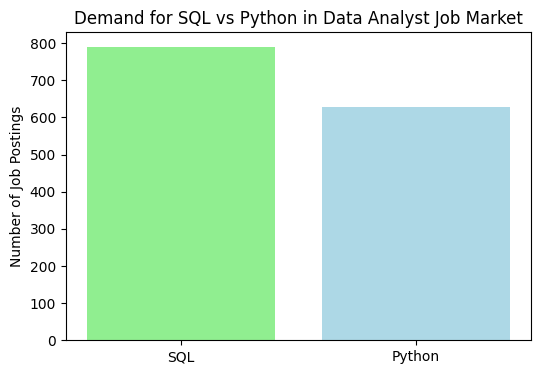

In [14]:
# Bar plot for SQL vs Python demand
plt.figure(figsize=(6,4))
plt.bar(["SQL", "Python"], [sql_count, python_count], color=['lightgreen', 'lightblue'])
plt.ylabel("Number of Job Postings")
plt.title("Demand for SQL vs Python in Data Analyst Job Market")
plt.show()


### Hypothesis 2 :

Skill Coverage Rate helps determine how well a bootcamp's curriculum aligns with the most in-demand skills in the job market.

Formula:
Skill Coverage=(Number of Top Skills Covered in Bootcamp /Total Top 10 In-Demand Skills)×100

Hypothesis:
H0(Null Hypothesis): Bootcamp graduates are fully job-market ready based on current skill set requirements.
H1(Alternative Hypothesis): While bootcamp graduates learn key skills, there are gaps in hands-on experience and certain emerging skills that may impact job readiness.

In [36]:

# Load job market skills data (Top 10 skills from job postings)
top_skills = ["SQL", "Python", "Excel", "Tableau/Power BI", "Statistics",
              "Google Analytics", "Cloud Computing","A/B Testing","KPIs","ETL Tools"]

# Load bootcamp curriculum (Skills taught in bootcamp)
bootcamp_skills = ["SQL", "Python", "Excel", "Tableau/Power BI", "Statistics", "KPIs", "A/B Testing"]

# Count how many top skills are covered by the bootcamp
covered_skills = len(set(bootcamp_skills) & set(top_skills))
total_top_skills = len(top_skills)

print(f"Bootcamp Covers {covered_skills}/{total_top_skills} of the Top 10 Skills.")


# Define observed proportion
observed_prop = covered_skills / total_top_skills  # Bootcamp skill coverage percentage
expected_prop = 0.8  # Expected 80% coverage

# Number of top skills analyzed
n = total_top_skills

# Perform One-Proportion Z-Test
count = covered_skills
nobs = n 
stat, p_value = proportions_ztest(count, nobs, expected_prop, alternative='larger')

print(f"Z-Statistic: {stat:.4f}, P-Value: {p_value:.4f}")

# Decision based on significance level (α = 0.05)
if p_value < 0.05:
    print("Reject Null Hypothesis: Bootcamp covers at least 80% of in-demand skills.")
else:
    print("Fail to Reject Null Hypothesis: Bootcamp does not cover 80% of in-demand skills.")


Bootcamp Covers 7/10 of the Top 10 Skills.
Z-Statistic: -0.6901, P-Value: 0.7549
Fail to Reject Null Hypothesis: Bootcamp does not cover 80% of in-demand skills.


AttributeError: 'VennDiagram' object has no attribute 'set_colors'

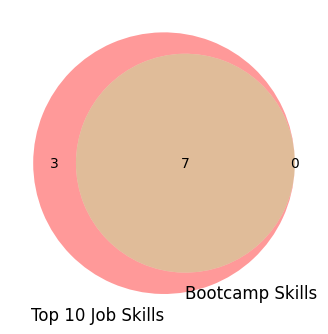

In [ ]:
# Create Venn Diagram
plt.figure(figsize=(6, 4))
venn=venn2([set(top_skills), set(bootcamp_skills)], ('Top 10 Job Skills', 'Bootcamp Skills'))
venn.set_colors(("lightblue", "lightgreen"))
plt.title("Skill Coverage Comparison")
plt.show()


### Hypothesis 3

 
Interpretation:
                     Proportion of Job Listings with ML vs. ETL/Cloud:
You could also look at the proportion of job listings that mention ML compared to the proportion of job listings that mention ETL or Cloud.

Proportion of ML Demand=
Number of Job Listings with ML/Total Job Listings
 
Similarly:

Proportion of ETL/Cloud Demand
=Number of Job Listings with ETL_Cloud / Total Job Listings
 
A significantly lower proportion of ML listings would indicate that ML is less in demand than ETL and Cloud skills.

Null Hypothesis (H₀):
The demand for Machine Learning (ML) skills is equal to or greater than the demand for ETL tools and Cloud skills in Data Analyst job postings.


Alternative Hypothesis (H₁):
The demand for Machine Learning (ML) skills is lower than the demand for ETL tools and Cloud skills in Data Analyst job postings.


In [53]:
# Data for Job Listings
ml_listings =  df_DA["Mapped_Skill_Set"].str.contains("ML").sum()
cloud_listings = df_DA["Mapped_Skill_Set"].str.contains("GCP").sum()
etl_listings = df_DA["Mapped_Skill_Set"].str.contains("ETL").sum()
total_listings = total_jobs
etl_cloud_listings=(cloud_listings+etl_listings)

# Proportions
p_ml = ml_listings / total_listings
p_etl_cloud = etl_cloud_listings / total_listings

# Pooled proportion
P = (ml_listings + etl_cloud_listings) / (total_listings * 2)

# Standard error
se = np.sqrt(P * (1 - P) * (1 / total_listings + 1 / total_listings))

# Z-statistic calculation
Z = (p_ml - p_etl_cloud) / se

# Perform one-tailed Z-test for proportions
alpha = 0.05
z_critical = 1.645  # One-tailed test, 95% confidence
print(f" {ml_listings} {cloud_listings} {etl_listings}")
# Result
if Z < -z_critical:
    print("Reject null hypothesis: ML demand is lower than ETL/Cloud demand.")
else:
    print("Fail to reject null hypothesis: No significant difference between ML and ETL/Cloud demand.")


 23 242 113
Reject null hypothesis: ML demand is lower than ETL/Cloud demand.


 23 355 


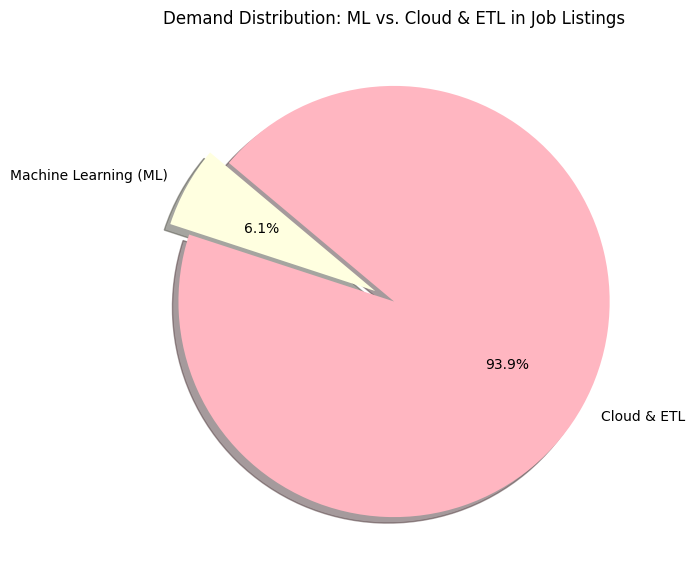

In [55]:
# Data for Job Listings
labels = ["Machine Learning (ML)", "Cloud & ETL"]
sizes = [ml_listings, etl_cloud_listings]
print(f" {ml_listings} {etl_cloud_listings} ")
colors = ["red", "blue"]
explode = (0.1, 0)  # Slightly separate the ML slice for emphasis

# Create Pie Chart
plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, autopct="%1.1f%%", colors = ["lightyellow", "lightpink"] , explode=explode, startangle=140, shadow=True)

# Title
plt.title("Demand Distribution: ML vs. Cloud & ETL in Job Listings")

# Show plot
plt.show()


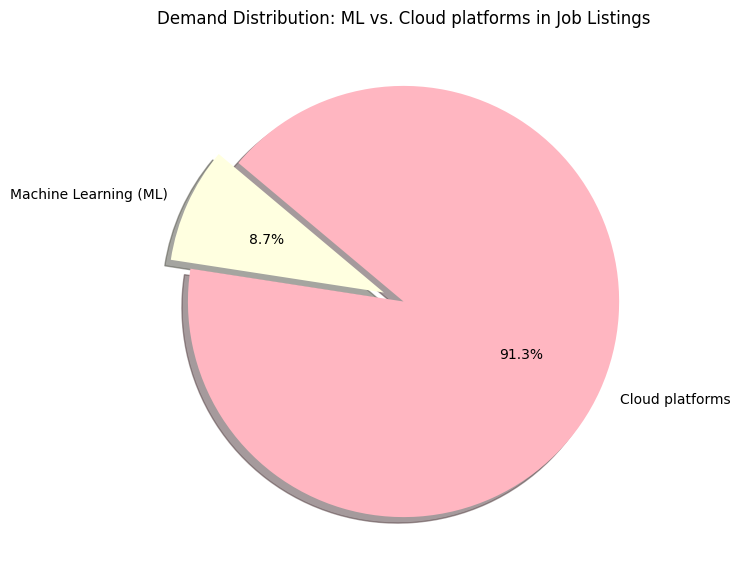

In [33]:
# Data for Job Listings
labels = ["Machine Learning (ML)", "Cloud platforms"]
sizes = [ml_listings, cloud_listings]
colors = ["red", "blue"]
explode = (0.1, 0)  # Slightly separate the ML slice for emphasis

# Create Pie Chart
plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, autopct="%1.1f%%", colors = ["lightyellow", "lightpink"] , explode=explode, startangle=140, shadow=True)

# Title
plt.title("Demand Distribution: ML vs. Cloud platforms in Job Listings")

# Show plot
plt.show()

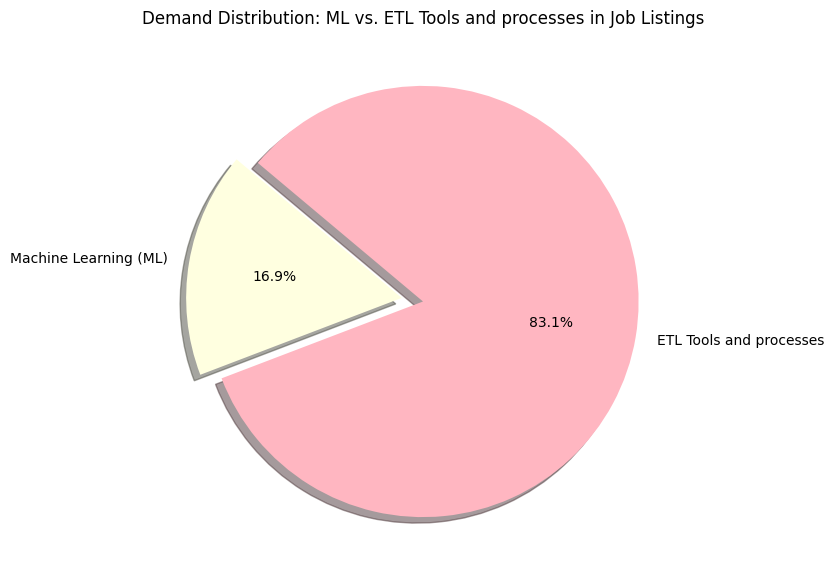

In [34]:
# Data for Job Listings
labels = ["Machine Learning (ML)", "ETL Tools and processes"]
sizes = [ml_listings, etl_listings]
colors = ["red", "blue"]
explode = (0.1, 0)  # Slightly separate the ML slice for emphasis

# Create Pie Chart
plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, autopct="%1.1f%%", colors = ["lightyellow", "lightpink"] , explode=explode, startangle=140, shadow=True)

# Title
plt.title("Demand Distribution: ML vs. ETL Tools and processes in Job Listings")

# Show plot
plt.show()

In [42]:
df_DA=df[df["Job_Title"]=='Data Analyst']
df_DS=df[df["Job_Title"]=='Data Scientist']
df_DE=df[df["Job_Title"]=='Data Engineer']

In [48]:
def count_skills(df, job_role):
    """Counts occurrences of specific skills in the given dataframe for a job role."""
    
    skill_counts = {
        "Skill": ["SQL", "Python", "Tableau/Power BI", "Statistics", "Machine Learning",
                  "Cloud Platforms", "ETL Tools", "A/B Testing", "KPI Dashboards"],

        job_role: [
            df["Mapped_Skill_Set"].str.contains("SQL", na=False).sum(),
            df["Mapped_Skill_Set"].str.contains("Python", na=False).sum(),
            df["Mapped_Skill_Set"].str.contains("Tableau", na=False).sum() + df["Mapped_Skill_Set"].str.contains("Power BI", na=False).sum(),
            df["Mapped_Skill_Set"].str.contains("Statistics", na=False).sum(),
            df["Mapped_Skill_Set"].str.contains("ML", na=False).sum(),
            df["Mapped_Skill_Set"].str.contains("GCP", na=False).sum() + df["Mapped_Skill_Set"].str.contains("AWS", na=False).sum() +df["Mapped_Skill_Set"].str.contains("Azure", na=False).sum(),
            df["Mapped_Skill_Set"].str.contains("ETL Tools", na=False).sum(),
            df["Mapped_Skill_Set"].str.contains("A/B testing", na=False).sum(),
            df["Mapped_Skill_Set"].str.contains("KPIs", na=False).sum()
        ]
    }

    return pd.DataFrame(skill_counts)


df_da_counts = count_skills(df_DA, "Data Analyst")
df_ds_counts = count_skills(df_DS, "Data Scientist")
df_de_counts = count_skills(df_DE, "Data Engineer")

# Merge all dataframes
df_merged = df_da_counts.merge(df_ds_counts, on="Skill").merge(df_de_counts, on="Skill")

# Display final dataframe
print(df_merged)


              Skill  Data Analyst  Data Scientist  Data Engineer
0               SQL           790             218            470
1            Python           628             396            503
2  Tableau/Power BI           814              84            141
3        Statistics           102              78              7
4  Machine Learning            23             152             50
5   Cloud Platforms           431             275            906
6         ETL Tools           113              16            197
7       A/B Testing            61              20              0
8    KPI Dashboards            56               3              6


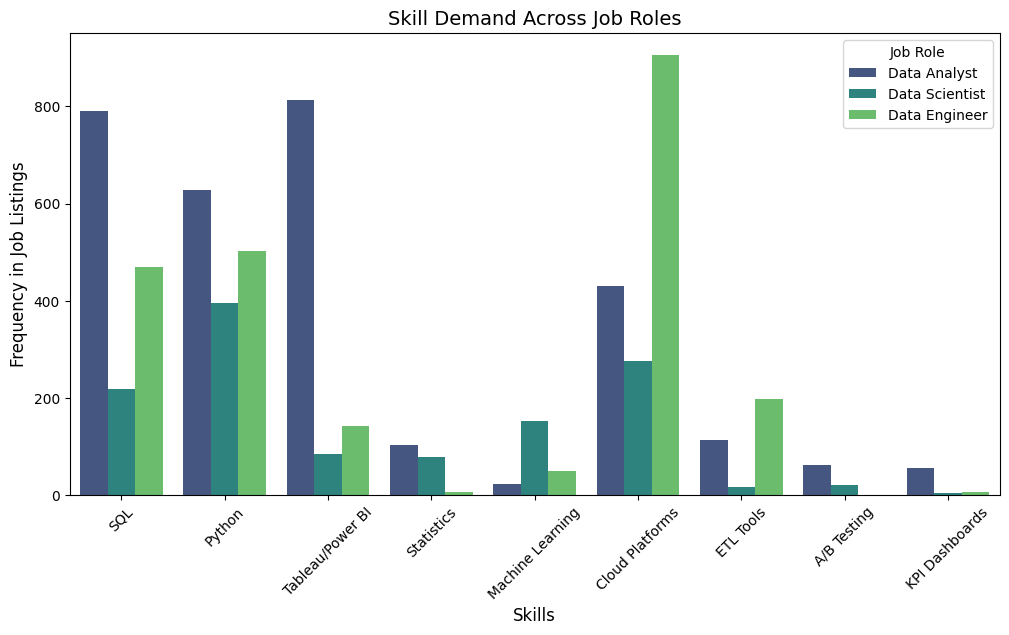

In [49]:

df_melted = df_merged.melt(id_vars="Skill", var_name="Job Role", value_name="Frequency")

# Plot bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=df_melted, x="Skill", y="Frequency", hue="Job Role", palette="viridis")

# Formatting the plot
plt.title("Skill Demand Across Job Roles", fontsize=14)
plt.xlabel("Skills", fontsize=12)
plt.ylabel("Frequency in Job Listings", fontsize=12)
plt.xticks(rotation=45)  # Rotate skill names for better readability
plt.legend(title="Job Role")

# Show the plot
plt.show()
